In [1]:
import torch, platform, sys
print("Python:", sys.executable)
print("PyTorch:", torch.__version__)

Python: /opt/conda/envs/anaconda-ai-2024.04-py310/bin/python
PyTorch: 2.2.0


In [2]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import grad

In [3]:
w = 200.0E-6
b = 1.0
model = torch.nn.Linear(1, 1)  # input dimension, output dimension

#overwrite random weights initially assigned
model.weight.data = torch.tensor([[w]])
model.weight.bias = torch.tensor([b])

In [4]:
nx = 5
x = torch.linspace(-1, 1, nx, requires_grad=True).unsqueeze(1)

In [5]:
d = model(x)

In [6]:
dd_dx = grad(d, x, torch.ones_like(x), create_graph=True, retain_graph=True)[0]

In [7]:
eps = dd_dx

In [8]:
E = 210000.0
sig = E * eps

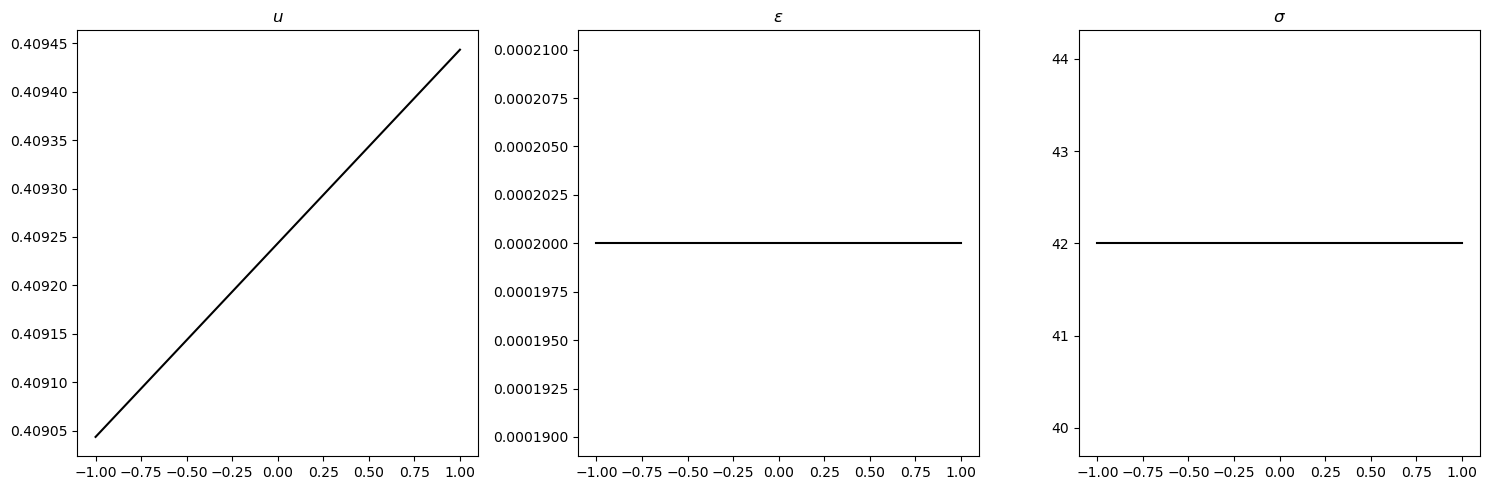

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(x.detach(), d.detach(), "k")
ax[0].set_title("$u$")
ax[1].plot(x.detach(), eps.detach(), "k")
ax[1].set_title("$\\varepsilon$")
ax[2].plot(x.detach(), sig.detach(), "k")
ax[2].set_title("$\\sigma$")
fig.tight_layout()
plt.show()